<a href="https://colab.research.google.com/github/pasosa-s/imdb_classifier/blob/master/imdb_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][0]

"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!"

In [6]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [7]:
data_lm.save()

In [ ]:
data = load_data(path)

In [8]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [9]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

In [16]:
data.train_ds[0][0]

Text [   2   70 2762   13 ...   11  847   17   11]

In [17]:
bs=48

In [18]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas')]

In [21]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg')]

In [22]:
data = (TextList.from_folder(path)
          .filter_by_folder(include=['train', 'test', 'unsup'])
          .split_by_rand_pct(0.1)
          .label_for_lm()
          .databunch(bs=bs))

In [26]:
data.save('data_lm.pkl')

In [29]:
data = load_data(path, 'data_lm.pkl', bs=bs)

In [30]:
data.show_batch()

idx,text
0,"on the fact that he was gay , unable to face up to the fact that it was her rejection of him that helped him along . xxmaj her second husband ( xxmaj steven xxmaj lang ) , not the boy 's father , is a little more lenient in his views , and this causes conflict . xxmaj when it 's obvious that two of the men at xxmaj"
1,"stop on a xxunk , and spin around to face the audience . xxmaj then they do the same thing again - and again ! xxmaj if that 's not enough to make you give up , then nothing is . xxbos xxmaj the xxmaj three xxmaj stooges has always been some of the many actors that i have loved . i love just about every one of the shorts"
2,"is in xxmaj alex xxmaj jones documentaries - that does not talk good for it . xxmaj no one wants to have any thing to do with it , because it is full of xxrep 4 xxunk . \n \n and secondly : if xxmaj bush and the shadow - government where willing to kill 2000 - 3000 people 9 / 11 because of power , why do they"
3,"us that she has been studying seven years on psychology , and never finishing a sentence . xxmaj obviously she needs a shrink herself . xxmaj but the most funny guy is xxmaj lars xxmaj xxunk ( xxmaj xxunk ) . xxmaj he has so many one liners , that are right in the bulls eye . xxmaj especially the one over the shrink question theme : "" xxmaj if"
4,". \n \n 3 ) xxmaj how can a helicopter fly as fast an an xxup f-16 ? \n \n 4 ) xxmaj how do you get a team composed of xxup exactly one xxmaj asian , one xxmaj latino , one xxmaj african - xxmaj american , one white woman and one homosexual ? \n \n ... and that 's just the first hour . xxmaj"


In [32]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

In [33]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


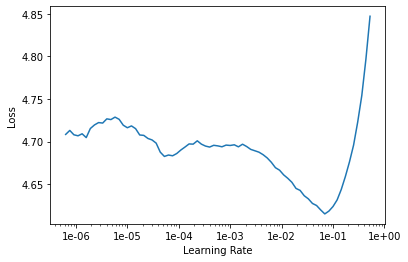

In [34]:
learn.recorder.plot(skip_end=15)

In [35]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.163165,4.014333,0.295657,1:29:09


In [36]:
learn.save('fit_head')

In [37]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [38]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because of all the good moments of the film . The story is about Kevin Costner 's kind of brutal , brutal murder and fear of death . The film is a good and touching film ,
I liked this movie because it is a movie that i saw for fans of The Movie Series . It 's not a movie that i loved . It 's not a great movie but it 's a sick pleasure


In [39]:
learn.save_encoder('fine_tuned_enc')

In [40]:
path = untar_data(URLs.IMDB)

In [43]:
data_clas = (TextList.from_folder(path, vocab=data.vocab)
              .split_by_folder(valid='test')
              .label_from_folder(classes=['neg', 'pos'])
              .databunch(bs=bs))

In [44]:
data_clas.save('data_clas.pkl')

In [45]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [46]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj titanic directed by xxmaj james xxmaj cameron presents a fictional love story on the historical setting of the xxmaj titanic . xxmaj the plot is simple , xxunk , or not for those who love plots that twist and turn and keep you in suspense . xxmaj the end of the movie can be figured out within minutes of the start of the film , but the love",pos
"xxbos xxmaj warning : xxmaj does contain spoilers . \n \n xxmaj open xxmaj your xxmaj eyes \n \n xxmaj if you have not seen this film and plan on doing so , just stop reading here and take my word for it . xxmaj you have to see this film . i have seen it four times so far and i still have n't made up my",pos
"xxbos xxunk ) is the developing world 's answer to xxmaj silence of the xxmaj lambs . xxmaj where ` xxmaj silence ' terrorized our peace of mind , ` xxmaj citizen ' exhausts and saddens us instead . xxmaj this dramatization of the xxmaj chikatilo case translates rather well , thanks to a xxmaj westernized friendship between two xxmaj rostov cops who become equals . \n \n xxunk",pos
"xxbos i 've rented and watched this movie for the 1st time on xxup dvd without reading any reviews about it . xxmaj so , after 15 minutes of watching i 've noticed that something is wrong with this movie ; it 's xxup terrible ! i mean , in the trailers it looked scary and serious ! \n \n i think that xxmaj eli xxmaj roth ( xxmaj",neg


In [47]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj bela made 9 pics for xxmaj monogram , but it was only at xxup this one , the xxup 4th , that things started to come together . xxmaj all the rest in the series would use this one as the essential template for production , writing and character development . xxmaj from here on , better or worse , the series would also deal with one essential theme : a scientist ( usually xxmaj bela ) makes experiments in the basement or the old house ( sometimes xxup in the basement in the old house ) that causes things to go xxunk . xxmaj this was also the first time that xxmaj art xxmaj director xxmaj dave xxmaj milton got a chance to spread his wings . xxmaj he came on board for xxup black xxup dragons , the flick before , but xxup this one is where he gets to make his craft start to click . xxmaj lewis made great atmosphere for next to nothing , and was around for all the rest of the xxmaj xxunk . xxmaj castin

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


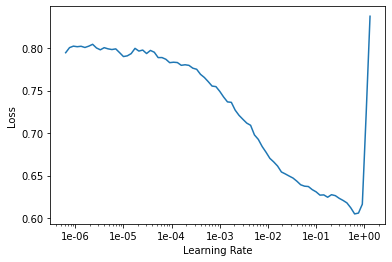

In [48]:
learn.lr_find()
learn.recorder.plot()

In [49]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.419888,0.317046,0.868320,09:58


In [50]:
learn.save('first')

In [ ]:
learn.load('first');

In [51]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.316347,0.231119,0.909200,11:05


In [52]:
learn.save('second')

In [ ]:
learn.load('second');

In [53]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.253875,0.185546,0.929680,15:53


In [54]:
learn.save('third')

In [ ]:
learn.load('third');

In [55]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.205825,0.174822,0.933280,19:52
1,0.201119,0.171346,0.936040,19:04


In [56]:
learn.save('last')

In [59]:
learn.predict("I really loved that movie, it was awesome!")

(Category tensor(1), tensor(1), tensor([3.6717e-06, 1.0000e+00]))